# EDA: Synthetic Fraud Dection Data

**Hypothesis**: Fraud attacks will likely happen within a relatively short window, with many micro transactions and possibly targeting a certain demographic. Look for anomalies in spending patterns across different groups (male/female or age groups etc).

*Questions*:
1. Do fraudulent transactions cluster at specific, unusual times of the day?
2. Is there a disproportionate number of fraud victims within a specific gender or age group?
3. Do fraudulent transactions overwhelmingly occur in specific spending categories?
4. Are fraudulent transactions, on average, smaller than legitimate ones, suggesting fraudsters are testing the waters?

In [1]:
import pandas as pd
import os
from pathlib import Path


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

In [2]:
notebook_dir = Path.cwd()
project_root = notebook_dir.parent

training_data = project_root/'data'/'raw'/'fraudTrain.csv'
test_data = project_root/'data'/'raw'/'fraudTest.csv'


df = pd.read_csv(training_data, index_col=0)
print('Dataframe succesfully created')
print(f'Dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Dataframe succesfully created
Dataframe has 1296675 rows and 22 columns.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [4]:
df.isna().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
print(f'Transctions that are fraud: {df['is_fraud'].value_counts()[1]}')
print(f'\nTransctions that are not fraud: {df['is_fraud'].value_counts()[0]}')
print(f'\nClass imbalanced; {(df['is_fraud'].value_counts()[0]/df.shape[0]):.2f} not fraud')


Transctions that are fraud: 7506

Transctions that are not fraud: 1289169

Class imbalanced; 0.99 not fraud


In [8]:
#libraries
import matplotlib.pyplot as plt
import seaborn as sns

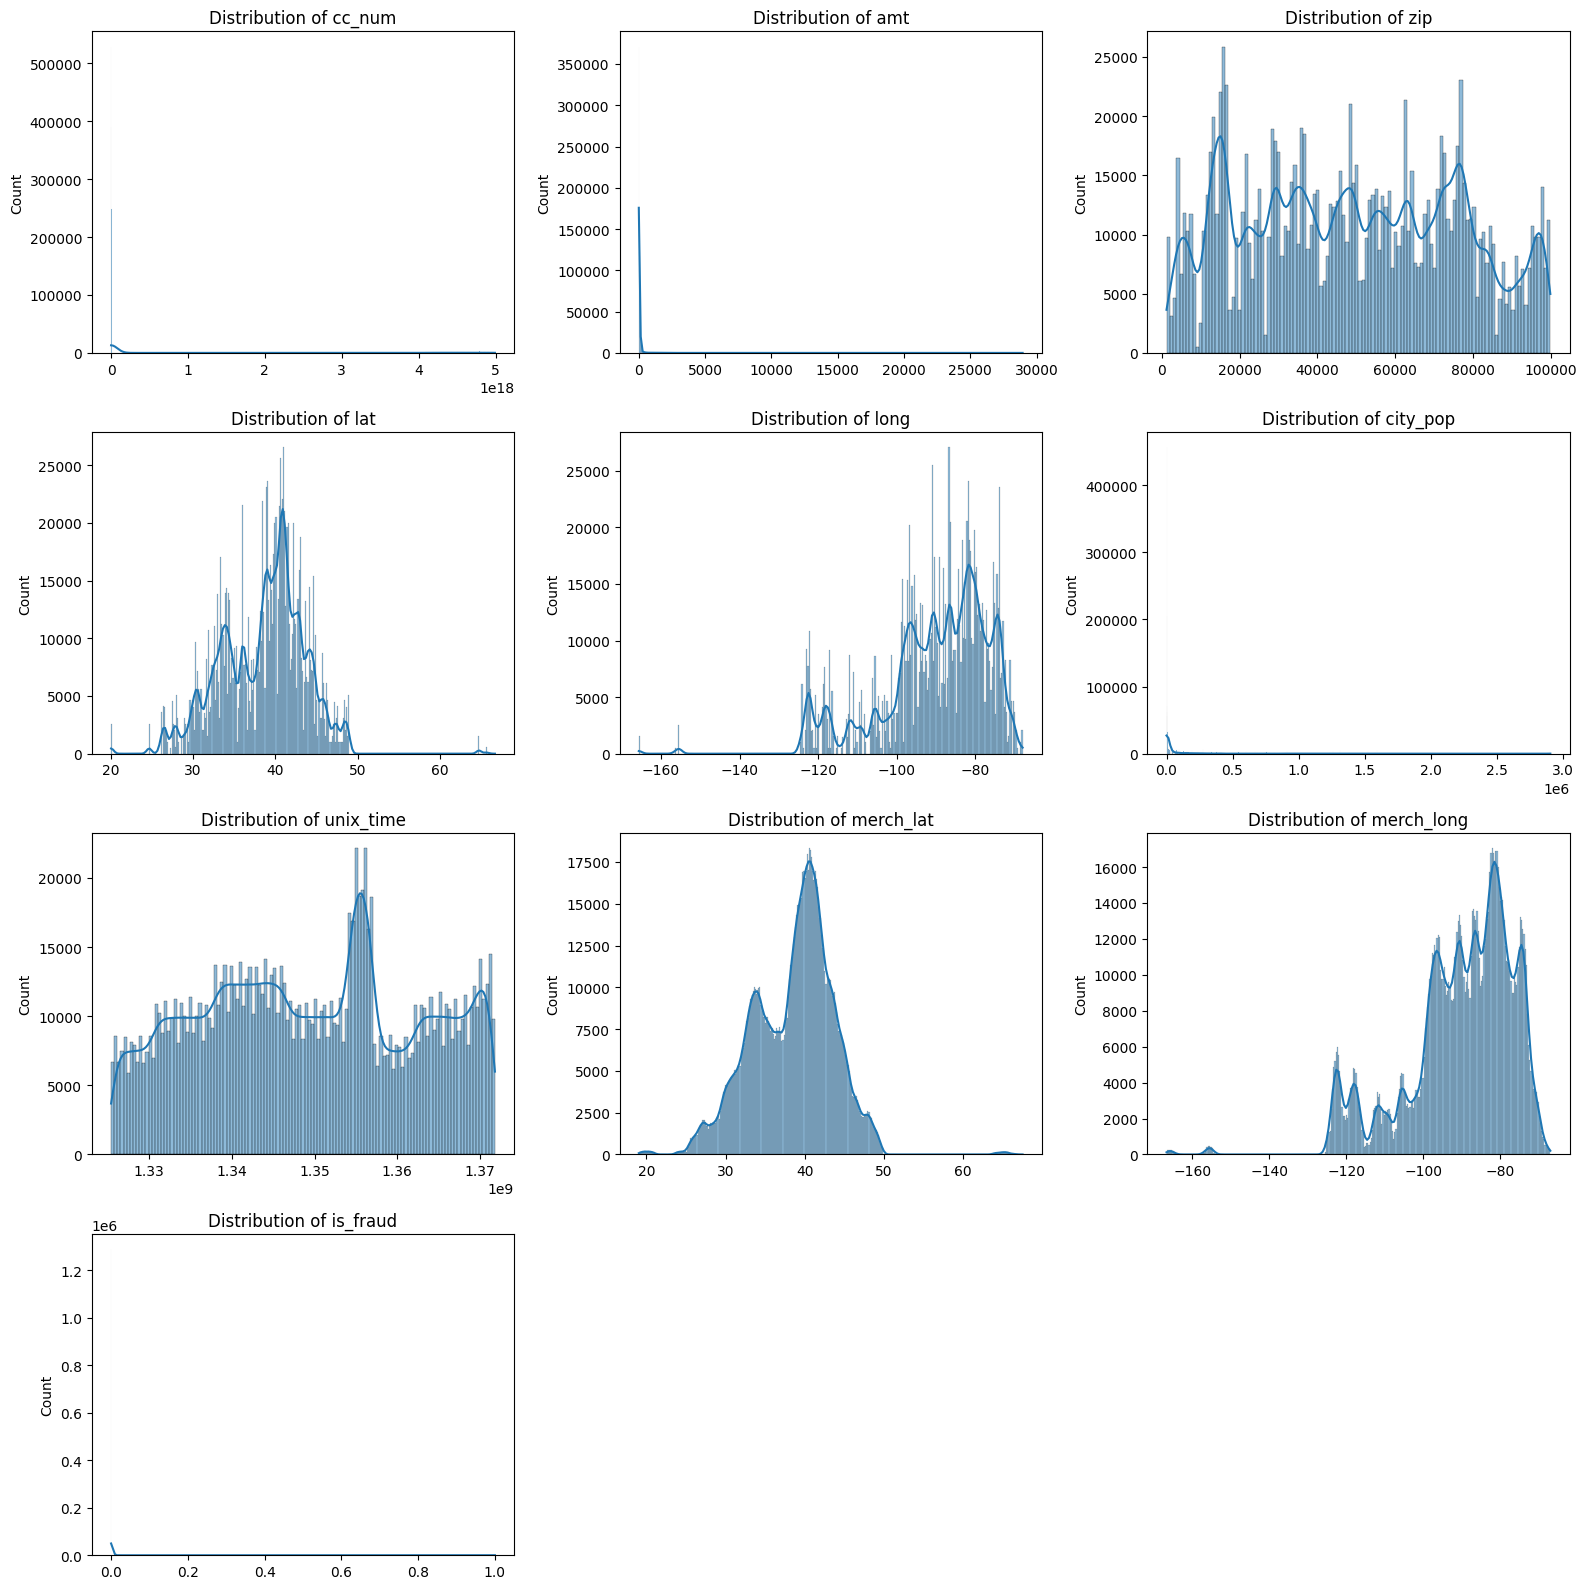

In [ ]:
#check data distribution of numeric columns

numerical_cols = df.select_dtypes(include=['int64','float64']).columns
n_cols= 3
n_rows = (len(numerical_cols)-1) // n_cols+1

fig,axes = plt.subplots(n_rows,n_cols, figsize=(16, n_rows*4))

for col, ax in zip(numerical_cols, axes.flatten()):
    sns.histplot(x=df[col], ax=ax, kde=True)

    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')

for i in range(len(numerical_cols), len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout()

plt.show()

In [ ]:
non_numeric_cols= df.select_dtypes(include=['object'])

non_numeric_cols.nunique()

trans_date_trans_time    1274791
merchant                     693
category                      14
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
job                          494
dob                          968
trans_num                1296675
dtype: int64

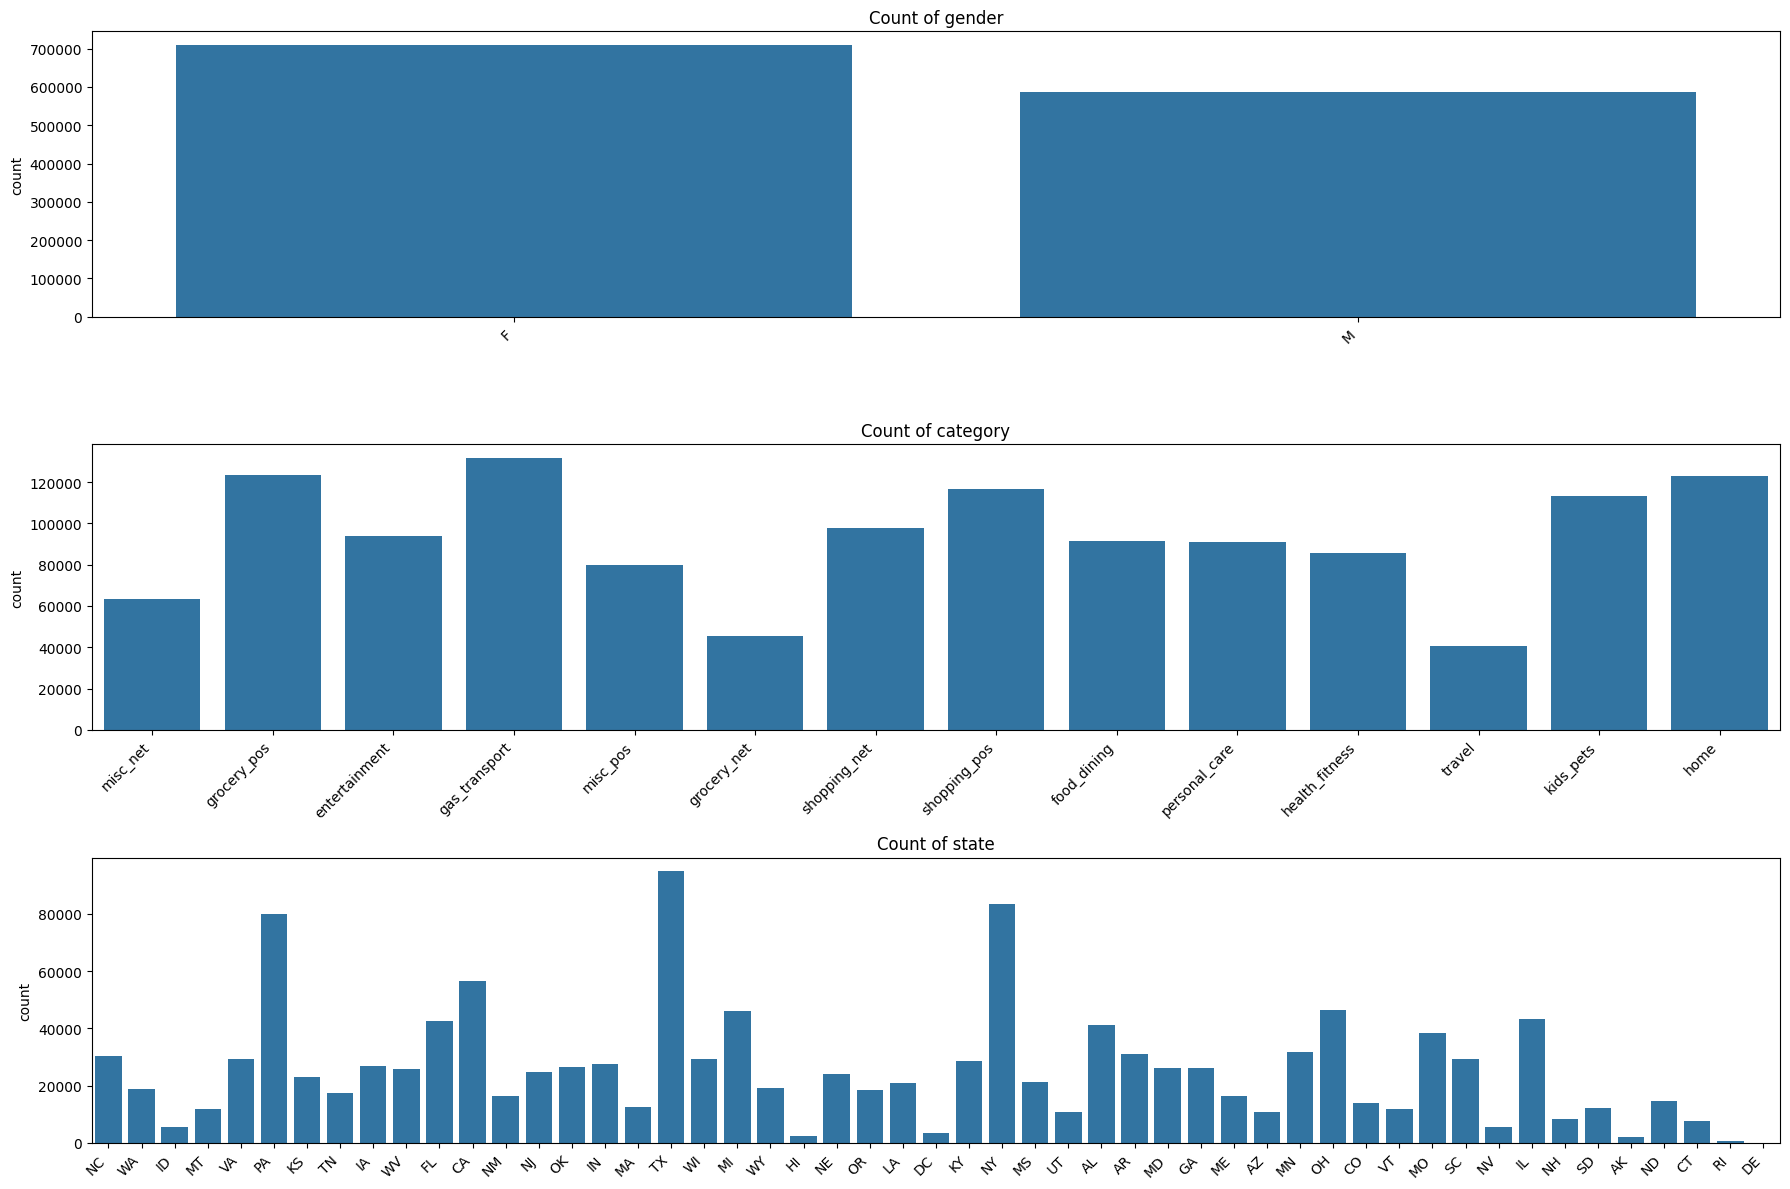

In [32]:
categorical_cols = ['gender', 'category', 'state']
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(n_cols*6, 12))
axes =axes.flatten()
for col, ax in zip(categorical_cols,axes):
    sns.countplot(data=df, x=col,ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
print(f'Count of unique values:\n{df['category'].value_counts()}')

print(f'\nCount of unique values:\n{df['gender'].value_counts()}')



Count of unique values:
category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

Count of unique values:
gender
F    709863
M    586812
Name: count, dtype: int64
